# This project is proposed for SDAIA T5 Data Science Bootcamp

by NAJLA    ALASSAF

# Predict Real Estate Prices In Melbourne

In [14]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
import statsmodels as sm
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")
sns.set_context("talk") 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
#Load dataset into a dataframe
#show the first few rows

rs =pd.read_csv('melb_data.csv', index_col=None)
rs.head()

,SellerG,Suburb,Address,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Biggin,Abbotsford,85 Turner St,2,h,1480000,S,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,Northern Metropolitan,4019
1,Biggin,Abbotsford,25 Bloomburg St,2,h,1035000,S,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
2,Biggin,Abbotsford,5 Charles St,3,h,1465000,SP,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
3,Biggin,Abbotsford,40 Federation La,3,h,850000,PI,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,Northern Metropolitan,4019
4,Nelson,Abbotsford,55a Park St,4,h,1600000,VB,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019


You can see we have more than one columns are not usful for our project, so we will delete the unnecessary columns.

In [16]:
rs.drop(columns= ["Postcode","Bedroom2","Bathroom", "Address", "YearBuilt", "CouncilArea", "Propertycount", "BuildingArea"] ,
        inplace = True)

In [17]:
#let's examine the datatypes searching for the null values & number of columns and rows and its datatype
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SellerG     13580 non-null  object 
 1   Suburb      13580 non-null  object 
 2   Rooms       13580 non-null  int64  
 3   Type        13580 non-null  object 
 4   Price       13580 non-null  int64  
 5   Method      13580 non-null  object 
 6   Distance    13580 non-null  float64
 7   Car         13518 non-null  float64
 8   Landsize    13580 non-null  int64  
 9   Regionname  13580 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [18]:
#making sure there is no null values
rs.isna().sum()

SellerG        0
Suburb         0
Rooms          0
Type           0
Price          0
Method         0
Distance       0
Car           62
Landsize       0
Regionname     0
dtype: int64

In [19]:
#it seems there are some null values in 'Car' column so we will replace the null values with mode


rs["Car"].fillna(rs["Car"].mode()[0], inplace=True)

In [54]:

rs.isna().any()

SellerG       False
Suburb        False
Rooms         False
Type          False
Price         False
Method        False
Distance      False
Car           False
Landsize      False
Regionname    False
dtype: bool

Outcomes:

- This shows that we have 10 columns and we have 13579 record.
- None of the data fields have NULL values.
- Datatype should be changed for both "Distance" and "Car", we will convert it to an integer.


In [21]:
#convert distance column 'distance' from float to integer 
rs['Distance'] = rs.Distance.astype('int64')
rs['Car'] = rs.Car.astype('int64')

Now we have no *null values* & the colmuns names are valid Python variables & datatype are the same. 


In [22]:
# View column data types
rs.dtypes

SellerG       object
Suburb        object
Rooms          int64
Type          object
Price          int64
Method        object
Distance       int64
Car            int64
Landsize       int64
Regionname    object
dtype: object

How many rows and columns does the dataset have?

In [23]:
rs.shape

(13580, 10)

In [24]:
rs.describe()

,Rooms,Price,Distance,Car,Landsize
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,9.689912,1.611856,558.416127
std,0.955748,6.393107e+05,5.876915,0.960793,3990.669241
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000
25%,2.000000,6.500000e+05,6.000000,1.000000,177.000000
50%,3.000000,9.030000e+05,9.000000,2.000000,440.000000
75%,3.000000,1.330000e+06,13.000000,2.000000,651.000000
max,10.000000,9.000000e+06,48.000000,10.000000,433014.000000


In [25]:
#showing sample of five rows to check the cleaned data randomly
rs.sample(n=5)

,SellerG,Suburb,Rooms,Type,Price,Method,Distance,Car,Landsize,Regionname
9681,Nelson,Parkville,2,u,900000,VB,1,1,2431,Northern Metropolitan
6686,Jas,Yarraville,3,h,1020000,PI,7,1,248,Western Metropolitan
241,hockingstuart,Armadale,1,u,280000,PI,6,1,0,Southern Metropolitan
6559,Greg,Williamstown North,2,u,380000,PI,8,1,0,Western Metropolitan
5504,Burnham,Seddon,2,h,990000,S,6,2,306,Western Metropolitan


# Exploratory Data Analysis

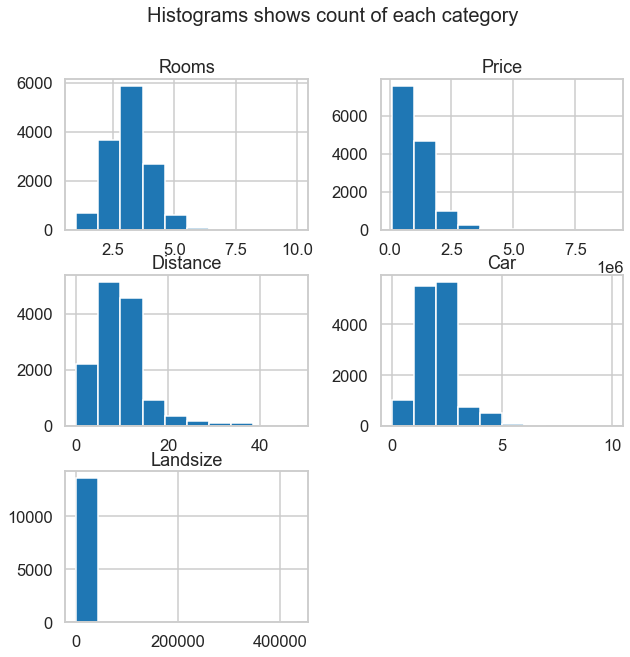

In [26]:
# Draw Histogram to show distribution of data for each feature
rs.hist(figsize=(10,10))
plt.suptitle('Histograms shows count of each category ', fontsize=20);

<AxesSubplot:>

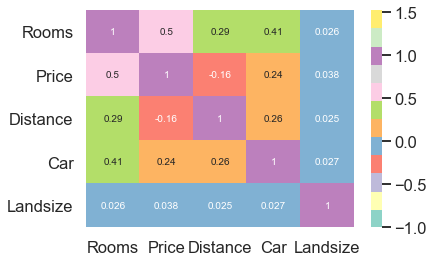

In [55]:
#use the corr() function to get an idea of the correlations among the different variables

sns.heatmap(rs.corr(), cmap="Set3", annot=True, vmin=-1, vmax=1.53)

C:\Users\Najla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


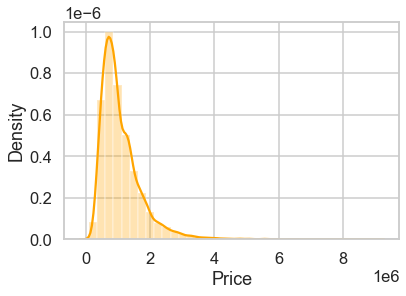

In [28]:
#take a look at how the real estate price is distributed
sns.distplot(rs['Price'], color='orange', bins=35, hist_kws={'alpha': 0.3});

In [29]:
#for a better view of the correlations in order

corr_matrix = rs.corr()
print(corr_matrix.Price.sort_values(ascending=False))

np.corrcoef(rs['Price'], rs['Rooms'])

Price       1.000000
Rooms       0.496634
Car         0.239109
Landsize    0.037507
Distance   -0.161727
Name: Price, dtype: float64


array([[1.        , 0.49663368],
       [0.49663368, 1.        ]])

As you can see there are Positive Moderate Correlation with (Rooms) & there is no correlation with (Landsize)
& Negitive Weak Correlation: (Distance) & Positive Weak Correlation: (Car)

Text(0.5, 1.0, 'the relation between rooms and price')

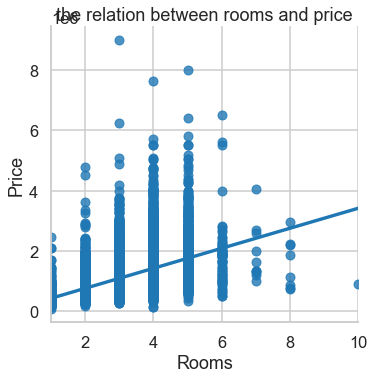

In [30]:
#checking the relationship between the price and rooms.
#Create a linear model plot using seaborn's lmplot.

sns.lmplot(x="Rooms",y="Price",data=rs, scatter=True, fit_reg=True,
           ci=None)
plt.title("the relation between rooms and price") # Change title for the plot

In [31]:
x=rs[['Rooms','Landsize','Car','Distance']]

In [32]:
x

,Rooms,Landsize,Car,Distance
0,2,202,1,2
1,2,156,0,2
2,3,134,0,2
3,3,94,1,2
4,4,120,2,2
...,...,...,...,...
13575,4,652,2,16
13576,3,333,2,6
13577,3,436,4,6
13578,4,866,5,6


In [33]:
Seller = pd.get_dummies(rs['SellerG'],drop_first=True)
Suburb=pd.get_dummies(rs['Suburb'],drop_first=True)
Type=pd.get_dummies(rs['Type'],drop_first=True)
Region=pd.get_dummies(rs['Regionname'],drop_first=True)

In [34]:
#TESTING
#CHECKING IF MY DUMMIES WORKS

Seller.head()

,ASL,Abercromby's,Ace,Alexkarbon,Allens,Anderson,Appleby,Aquire,Area,Ascend,...,Zahn,buyMyplace,hockingstuart,hockingstuart/Advantage,hockingstuart/Barry,hockingstuart/Village,iOne,iProperty,iSell,iTRAK
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x=pd.concat([x,Seller,Suburb,Type,Region],axis=1)
y=rs.Price

#LET'S TAKE A LOOK

In [36]:
x

,Rooms,Landsize,Car,Distance,ASL,Abercromby's,Ace,Alexkarbon,Allens,Anderson,...,Yarraville,t,u,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,202,1,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,156,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,134,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,94,1,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,120,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,652,2,16,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13576,3,333,2,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13577,3,436,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13578,4,866,5,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
y

0        1480000
1        1035000
2        1465000
3         850000
4        1600000
          ...   
13575    1245000
13576    1031000
13577    1170000
13578    2500000
13579    1285000
Name: Price, Length: 13580, dtype: int64

In [38]:
#checking the unique values so i can decide the outliers
rs.Rooms.nunique()

9

In [39]:
#show colmn with this problem

print(np.where(rs['Rooms'] ==10 ))

(array([11304], dtype=int64),)


In [40]:
#show colmn with this problem
print(np.where(rs['Price']>6000000))

(array([ 3616,  6372,  7692,  9575, 12094, 12557], dtype=int64),)


In [41]:
# Drop the column with outliers index
rs.drop(rs.index[[3616,  6372,  7692,  9575,11304, 12094, 12557]], inplace= True, axis=0)

Text(0.5, 1.0, 'the relation between rooms and price')

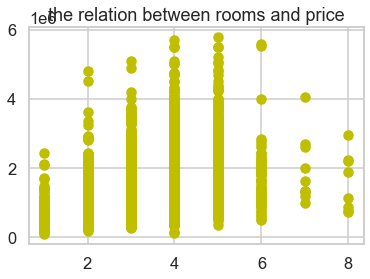

In [42]:
#show the relation between rooms and price after drop outliers index

plt.scatter(rs.Rooms,rs.Price,c='y',zorder=3)
plt.title("the relation between rooms and price") # Change title for the plot


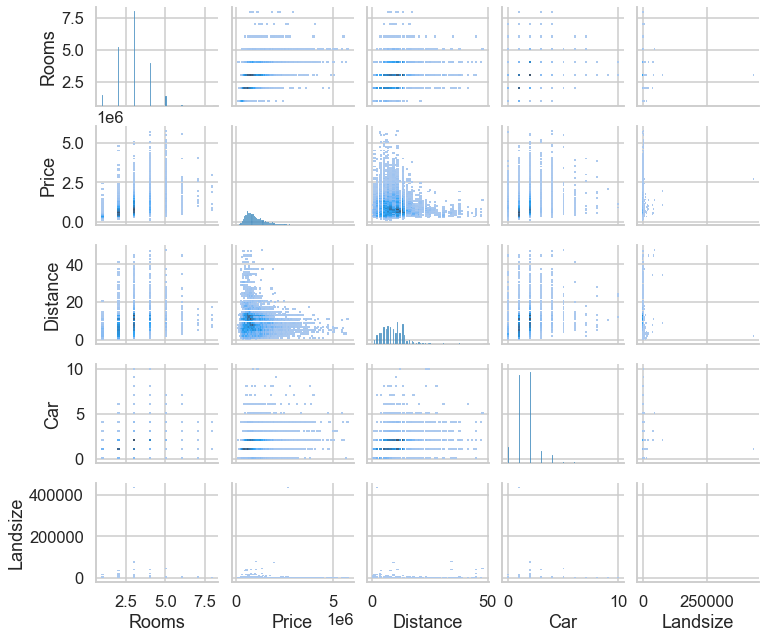

In [43]:
#Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(rs, height=1.8, aspect=1.2, kind='hist',palette=None);


# MODELING
we wil use Linear Regression model

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Models were called and trained on data from the Scikit-lear
#The data was divided into 80 training set and 20 test set to train the models on this data

In [45]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test:  ", y_test.shape)

x_train:  (10864, 593)
y_train:  (10864,)
x_test:  (2716, 593)
y_test:   (2716,)


In [46]:
# Initialize model object

lr = LinearRegression()

# fit model
fitted_lr = lr.fit(x_train, y_train)

# make predictions
predictions = lr.predict(x_test)
predictions

array([1719783.65682531,  775734.96524912,  708875.46964078, ...,
       1023632.7746447 , 1660558.92000466, 1206487.78482457])

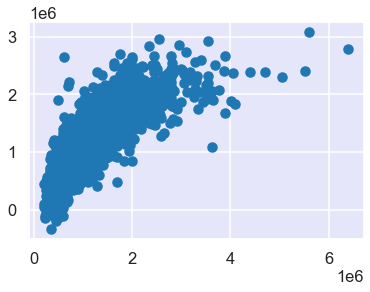

In [47]:
sns.set_style("darkgrid", {'grid.linestyle': '-','axes.facecolor':'lavender'})

plt.scatter(y_test,predictions)


In [48]:
#findout the R square for testing set
r2_lr=r2_score(y_test, predictions)
print("Linear Regression R^2 Score testing set: ", r2_lr)

Linear Regression R^2 Score testing set:  0.6657847284832492


In [49]:
#findout the R square for training set
t_2= lr.score(x_train, y_train)
print("Linear Regression R^2 Score trining set: ", t_2)

Linear Regression R^2 Score trining set:  0.685533710973137


In [50]:
#findout the Adj R square for training set
adjusted_r_squared_1 = 1 - (1-(t_2))*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_1

0.6711737456725879

In [51]:
#findout the Adj R square for testing set
adjusted_r_squared_2 = 1 - (1-(r2_lr))*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_2

0.6505229345505961

In [52]:
#Score model
print("Linear Regression R^2 Score: ", round(fitted_lr.score(x_test, y_test), ndigits=1))

Linear Regression R^2 Score:  0.7


# THANK YOU ALL FOR YOUR ATTENTION.